<a href="https://colab.research.google.com/github/danifer126/Diplomado_Ciencia_Datos/blob/main/Diplomado_Ciencia_Datos%20/Tareas/Codigo_clasificador_ausentismo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CLASIFICADOR DE AUSENTISMO DE ESTUDIANTES DE ECUCACIÓN SUPERIOR

## PRE-PROCESAMIENTO DE LOS DATOS
### Cargue de datos

---



In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm
import multiprocessing
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

### Datos originales

In [13]:

# Carga el archivo .xlsx en un DataFrame
df_encuesta = pd.read_excel('CARACTERIZACION.xlsx','Datos')
df_codificacion = pd.read_excel('CODIFICACION.xlsx','Hoja1')



Lista de preguntas que tienen respuestas multiples

In [2]:
multi=[
  # ACADEMICAS
  'PROMEDIO ACUMULADO',
  'En cuál de las siguientes áreas tiene mayor debilidad.',
'¿Las razones por las que dejó de estudiar el programa de lengua extranjera o de nivel técnico o tecnológico son? (Múltiple respuesta)',
'¿Por cuáles de las siguientes razones ha contemplado o contemplaría abandonar sus estudios? (puede marcar varias opciones)',
'¿Las razones por las que dejó de estudiar el programa de pregrado son? (Múltiple respuesta) ',
'Inmediatamente después de haber obtenido el último título educativo: (Multiple respuesta)',
'¿Durante su educación media presentó alguna de las siguientes situaciones? (Múltiple respuesta)',
'¿Cuáles de las siguientes herramientas tecnológicas digitales maneja?  (Múltiple respuesta)',
'¿Por cuáles de las siguientes razones ha contemplado o contemplaría abandonar sus estudios? (puede marcar varias opciones)',
  # FAMILIARES
'¿Actualmente en su familia se presentan algunas de las siguientes situaciones? (Múltiple respuesta)',
'Los apoyos recibidos por familia, amigos y/o conocidos para realizar sus estudios están orientados a:  (Múltiple respuesta)',
  # INDIVIDUALES
'Sus mayores temores con relación a la vida universitaria son (Múltiple respuesta)',\
  '¿Consume o ha consumido alguna Sustancia Psicoactiva (legal o ilegal) durante los últimos seis meses?',
'¿Con cuál de las siguentes relaciones no se siente satisfecho? (Múltiple respuesta) ',
'¿Cuál(es) de las siguientes situaciones ha presentado alguna vez? (Múltiple respuesta)',
'¿Cuál(es) de las siguientes situaciones se le han presentado en su vida (Múltiple respuesta)',
'Posee alguna  necesidad educativa diferenciada como: (Múltiple respuesta)',
'Se reconoce o pertenece a alguno de los siguientes grupos poblacionales: (Múltiple respuesta)',
'Si usted se auto reconoce como indígena, seleccione a cuál pueblo indígena pertenece',
'¿Cuáles son los aspectos más importantes en su vida? (Múltiple respuesta)',
'Frecuentemente ¿cómo se transporta a la universidad?',
'¿Qué tipo de actividad realiza en su tiempo libre?',
  # SOCIOECONOMUCAS
'¿Cuál de las siguientes opciones representa su principal motivo para trabajar? (Múltiple respuesta)',
'¿Cuál(es) de los siguientes gastos universitarios NO está en condiciones de cubrir con recursos propios o familiares? (Múltiple respuesta)',
'¿Con qué medios tecnológicos cuenta?  (Múltiple respuesta)',
'¿Cuáles de las siguientes características se presentan en el sector donde usted vive? (Múltiple respuesta)']


# preguntas multiples por cada componente
multi_academic=multi[0:7]
multi_familiar=multi[7:9]
multi_individual=multi[9:18]
multi_socio=multi[18:23]

Se elabora una función para convertir en variables dummies a la variables de selección multiple, ya que pueden encontrarse más de una opción por cada individuo,.

In [3]:


import pandas as pd


def procesar_variable(variable):
    filtro = df_codificacion['PREGUNTA'] == variable
    categorias = df_codificacion.loc[filtro, 'RESPUESTA'].tolist()
    respuestas = df_encuesta[variable].tolist()
    df = pd.DataFrame(columns=categorias)
    for respuesta in respuestas:
        row = {categoria: 1 if pd.Series(str(respuesta)).str.contains(categoria).any() else 0 for categoria in categorias}
        df = df.append(row, ignore_index=True)
    return df


def multiples(variable):
  df_vacio = pd.DataFrame()
  num_nucleos = multiprocessing.cpu_count()
  pool = multiprocessing.Pool(processes=num_nucleos)
  resultados = pool.map(procesar_variable, variable)
  pool.close()
  pool.join()
  df_vacio = pd.concat(resultados, axis=1)
  return df_vacio



La función  dividir_variables divide las componentes entre conjutos con variables únicas y otro con varaibles múltiples


In [4]:
# divide un dataframe en dos, dependendiend de una lsita de nombres de varriables.

def dividir_variables(df, lista_variables):
    variables_en_lista = [col for col in lista_variables if col in df.columns]
    variables_no_en_lista = [col for col in df.columns if col not in lista_variables]

    df_en_lista = df[variables_en_lista].copy()
    df_no_en_lista = df[variables_no_en_lista].copy()

    return df_en_lista, df_no_en_lista


#est1,test2=dividir_variables(academic,multi_academic)

### Codificación One Hot

Se codifican todas las varaibles de forma dummie y se descargan los conjuntos resultados, ya que por el tamaño del conjunto y la cantidad de variables toma tiempo considerable correr frecuentemente este codigo.

In [ ]:

# Preguntas componente socioeconómico
socio=df_encuesta.iloc[:,59:95]
# Se separan en variables multiples y varaibles de respuesta única
soci_respmulti,soci_respunic=dividir_variables(socio,multi_socio)
#Se convierte en variables dummies a las varaibles de respuesta única
soci_encoded = pd.get_dummies(soci_respunic)
#Se convierte en variables dummies a las varaibles de respuestas múltiples
soci_multi_encode=multiples(multi_socio)

# se concatenan los dos conjuntos
socio_encoded = pd.concat([soci_encoded, soci_multi_encode], axis=1)
# se almacena en disco el conjunto obtenido
socio_encoded.to_excel("socio_encoded.xlsx", index=False, header=True)

In [ ]:
# Preguntas componente académico
academic=df_encuesta.iloc[:,6:31]
# Se separan en variables multiples y varaibles de respuesta única
academic_respmulti,academic_respunic=dividir_variables(academic,multi_academic)
#Se convierte en variables dummies a las varaibles de respuesta única
academic_encoded = pd.get_dummies(academic_respunic)
#Se convierte en variables dummies a las varaibles de respuestas múltiples
acada_multi_encode=multiples(multi_academic)

# se concatenan los dos conjuntos
academic_encoded = pd.concat([academic_encoded, acada_multi_encode], axis=1)
# se almacena en disco el conjunto obtenido
academic_encoded.to_excel("academic_encoded.xlsx", index=False, header=True)

In [ ]:
# Preguntas componente individual
individuo=df_encuesta.iloc[:,42:59]
# Se separan en variables multiples y varaibles de respuesta única
indi_respmulti,indi_respunic=dividir_variables(individuo,multi_individual)
#Se convierte en variables dummies a las varaibles de respuesta única
indi_encoded = pd.get_dummies(indi_respunic)
#Se convierte en variables dummies a las varaibles de respuestas múltiples
indi_multi_encode=multiples(multi_individual)
# se concatenan los dos conjuntos
individuo_encoded = pd.concat([indi_encoded, indi_multi_encode], axis=1)
# se almacena en disco el conjunto obtenido
individuo_encoded.to_excel("individuo_encoded.xlsx", index=False, header=True)

In [ ]:
# Preguntas componente familiar
familiar=df_encuesta.iloc[:,32:44]
# Se separan en variables multiples y varaibles de respuesta única
multi_familiar2,familia_respunic=dividir_variables(familiar,multi_familiar)
#Se convierte en variables dummies a las varaibles de respuesta única
familia_encoded = pd.get_dummies(familia_respunic)
#Se convierte en variables dummies a las varaibles de respuestas múltiples
famili_multi_encode=multiples(multi_familiar)
# se concatenan los dos conjuntos
familiar_encoded = pd.concat([familia_encoded, famili_multi_encode], axis=1)
# se almacena en disco el conjunto obtenido
familiar_encoded.to_excel("familiar_encoded.xlsx", index=False, header=True)


#### Datos con todas las preguntas

In [9]:

academic_encoded = pd.read_excel('academic_encoded.xlsx')
familiar_encoded = pd.read_excel('familiar_encoded.xlsx')
individuo_encoded = pd.read_excel('individuo_encoded.xlsx')
socio_encoded = pd.read_excel('socio_encoded.xlsx')

#### Datos sin las preguntas multiples

In [39]:

### CONJUNTOS DE DATOS SIN LAS VARIABLES CON RESPUESTAS MULTIPLES
academic=df_encuesta.iloc[:,6:31]
academic=academic.drop(columns=[col for col in multi if col in academic.columns])

individuo=df_encuesta.iloc[:,42:59]
individuo=individuo.drop(columns=[col for col in multi if col in individuo.columns])

socio=df_encuesta.iloc[:,59:95]
socio=socio.drop(columns=[col for col in multi if col in socio.columns])

familiar=df_encuesta.iloc[:,32:44]
familiar=familiar.drop(columns=[col for col in multi if col in familiar.columns])



academic_encoded = pd.get_dummies(academic)
familiar_encoded = pd.get_dummies(familiar)
individuo_encoded = pd.get_dummies(individuo)
socio_encoded = pd.get_dummies(socio)


### Análisis de componentes principales para cada dimensión

Se elabora

In [10]:
from sklearn.decomposition import PCA
import numpy as np

def apply_pca(datos, umbral_varianza=0.90):    # umbral de varianza explicada
    # Crear objeto PCA y ajustar los datos

    pca = PCA()
    pca.fit(datos)


    # Calcular el número de componentes necesarios para alcanzar el umbral de varianza
    varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)
    num_componentes = np.argmax(varianza_acumulada >= umbral_varianza) + 1
   # print(varianza_acumulada)
    # Reducir la dimensionalidad utilizando los componentes seleccionados
    componentes_principales = pca.transform(datos)[:, :num_componentes]
    print("Número de componentes seleccionados:", num_componentes, ", Número de cols inicial:",datos.shape[1])

    return componentes_principales



In [40]:
academic_pca=pd.DataFrame(apply_pca(academic_encoded))
familiar_pca=pd.DataFrame(apply_pca(familiar_encoded))
individuo_pca=pd.DataFrame(apply_pca(individuo_encoded))
socio_pca=pd.DataFrame(apply_pca(socio_encoded))



Número de componentes seleccionados: 35 , Número de cols inicial: 157
Número de componentes seleccionados: 17 , Número de cols inicial: 42
Número de componentes seleccionados: 11 , Número de cols inicial: 125
Número de componentes seleccionados: 55 , Número de cols inicial: 596


### Selección de conjunto

Dependiendo de cual conjunto de datos se seleccione en este partado se concatena en el conjunto **X** y el **y**

In [41]:
# Targets (Y) y features (X)

X = pd.concat([academic_pca,familiar_pca,individuo_pca,socio_pca], axis=1).astype(float)
#X=familiar_pca.astype(float)
y = df_encuesta.iloc[:, 1].replace({'Si': 0, 'No': 1}).astype(int)




### **Balanceo de conjunto de validación**

Considerando los problemas que se pueden generar por el desbalanceo de datos, se propone utilizar sobre los conjuntos previamente defincidos el balanceo para el conjunto de entrenamiento.

In [42]:
# Separa features y targets
targets = df_encuesta.iloc[:, 1].replace({'Si': 0, 'No': 1})
targets = np.array(targets, dtype = 'uint8')
targets.reshape((targets.shape[0],1))
#
features = np.array(X,dtype = 'float32')
#
print("tamaño de los targets: ",targets.shape)
print("tamaño de los features: ",features.shape)

tamaño de los targets:  (3401,)
tamaño de los features:  (3401, 118)


In [43]:

targetsdf=pd.DataFrame(targets)
print(len(targetsdf))
condicion=targetsdf[0]<1
targetsdf0=targetsdf[condicion]
print(len(targetsdf0))
print(targetsdf0)

condicion1=targetsdf[0]>0
targetsdf1=targetsdf[condicion1]
print(len(targetsdf1))
print(targetsdf1)

3401
2854
      0
0     0
1     0
2     0
3     0
4     0
...  ..
3394  0
3395  0
3396  0
3397  0
3398  0

[2854 rows x 1 columns]
547
      0
5     1
18    1
27    1
34    1
48    1
...  ..
3381  1
3384  1
3391  1
3399  1
3400  1

[547 rows x 1 columns]


In [44]:
num_val_samples = int(len(targetsdf1) * 0.2)
train_targets1 = targetsdf1[:-num_val_samples]
val_targets1 = targetsdf1[-num_val_samples:]

print("Number of training samples:", len(train_targets1))
print("Number of validation samples:", len(val_targets1))

Number of training samples: 438
Number of validation samples: 109


In [47]:
# Configurar la semilla aleatoria (opcional)
random_seed = 57
pd.np.random.seed(random_seed)

# Tamaño de la muestra deseada
tam_muestra = 438

# Realizar el muestreo aleatorio simple

muestra = targetsdf0.sample(n=tam_muestra, replace=False)
print("Muestra:")
#print(muestra)
muestra0=pd.DataFrame(muestra)
print(muestra0)

Muestra:
      0
640   0
2800  0
560   0
2646  0
1204  0
...  ..
364   0
90    0
1284  0
2583  0
1006  0

[438 rows x 1 columns]


In [18]:
EtiqBalanceados=pd.concat([muestra0,train_targets1])
EtiqBalanceados
indiceBal=pd.array(EtiqBalanceados.index)
print(indiceBal)

<PandasArray>
[ 640, 2800,  560, 2646, 1204,  744,  552, 2853,  470, 3218,
 ...
 2728, 2732, 2749, 2755, 2760, 2766, 2770, 2774, 2776, 2781]
Length: 876, dtype: int64


El conjunto de muestra balanceados

In [48]:
XBalanceados = X.iloc[indiceBal]

y = df_encuesta.iloc[indiceBal, 1].replace({'Si': 0, 'No': 1}).astype(int)



todosIndices = np.arange(len(X.index))  # Vector de todos los índices posibles


complementoIndices = np.setdiff1d(todosIndices, indiceBal)

X_RESTO = X.loc[complementoIndices]

y_RESTO = df_encuesta.iloc[complementoIndices, 1].replace({'Si': 0, 'No': 1}).astype(int)



# Modelo de redes de propagación en tensor flow



In [20]:
from __future__ import absolute_import, division, print_function, unicode_literals
#
#import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
#

from tensorflow.keras.models import Model
#
from tensorflow.keras.layers import Dense, Input, Activation, Dropout
#
from tensorflow.keras.utils import plot_model
#
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

#
from tensorflow.keras. metrics import FalseNegatives, FalsePositives, TrueNegatives
from tensorflow.keras. metrics import TruePositives, Precision, Recall
#
from tensorflow.keras.optimizers import Adam
#
from tensorflow.keras import callbacks
#
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
print(tf.__version__)

2.12.0


### Selección de datos

Se pueden seleccionar los dos tipos de datos utilizados para la evaluación del modelo, ya sea con o sin las variables multiples o con el conjunto balanceado

Tensores de entrada

In [22]:
# Separa features y targets
targets = y
#
features = np.array(X,dtype = 'float32')
#
print("tamaño de los targets: ",targets.shape)
print("tamaño de los features: ",features.shape)



tamaño de los targets:  (876,)
tamaño de los features:  (3401, 199)


Prepara datos de entrenamiento y de validación

Muestreo de conjunto de entrenamiento y validación haciendo uso del muestreo estratificado según las categorias de la variable respuesta

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit


stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=4418)

train_indices, test_indices = next(stratified_split.split(X, y))

train_features, val_features = X.iloc[train_indices], X.iloc[test_indices]
train_targets, val_targets = y.iloc[train_indices], y.iloc[test_indices]


En caso de utilizar los datos balanceados se debe correr el siguiente codigo:

In [49]:


train_features = XBalanceados
train_targets = y
val_features = X_RESTO
val_targets = y_RESTO


print("Number of training samples:", len(train_features))
print("Number of validation samples:", len(val_features))

Number of training samples: 876
Number of validation samples: 2525


Estandarización de los datos que van a entrar en el modelo

In [50]:
# crea el objeto StandardScaler
scaler = StandardScaler()

# Ajusta los parámetros del scaler
scaler.fit(train_features)

# escala training y test
train_features = scaler.transform(train_features)
val_features = scaler.transform(val_features)

Analiza el desbalance en los targets



In [51]:
# Cuenta las frecuencias de los datos
counts = np.bincount(train_targets)
print(
    "Number of positive samples in training data: {} ({:.2f}% of total)".format(
        counts[1], 100 * float(counts[1]) / len(train_targets)
    )
)

# Crea los pesos para el entrenamiento. Más peso a los menos frecuentes (1)
weight_for_0 =  1/counts[0]   #counts[0]/ (counts[0]+counts[1])# 1/counts[0]          #
weight_for_1 = 1/counts[1]   #counts[1]/ (counts[0]+counts[1])  #

Number of positive samples in training data: 438 (50.00% of total)


In [52]:
print(weight_for_1)
print(weight_for_0)


0.00228310502283105
0.00228310502283105


###  Crear modelo

In [54]:
inputs = Input(shape=(train_features.shape[1],),name='capa_entrada')

# vamos construyendo capa por capa

x = Activation('relu')(inputs)
x = Dense(512, activation='relu',name='primera_capa_oculta')(x)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu',name='segunda_capa_oculta')(x)
x = Dropout(0.2)(x)
x = Dense(32, activation='relu',name='tercera_capa_oculta')(x)


outputs = Dense(1, activation='sigmoid', name='capa_salida')(x)

# Creamos ahora el modelo
model = Model(inputs=inputs, outputs=outputs)

In [55]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 capa_entrada (InputLayer)   [(None, 118)]             0         
                                                                 
 activation_2 (Activation)   (None, 118)               0         
                                                                 
 primera_capa_oculta (Dense)  (None, 512)              60928     
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 segunda_capa_oculta (Dense)  (None, 256)              131328    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 tercera_capa_oculta (Dense)  (None, 32)               8224

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 capa_entrada (InputLayer)   [(None, 118)]             0         
                                                                 
 activation_2 (Activation)   (None, 118)               0         
                                                                 
 primera_capa_oculta (Dense)  (None, 512)              60928     
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 segunda_capa_oculta (Dense)  (None, 256)              131328    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 tercera_capa_oculta (Dense)  (None, 32)               8224

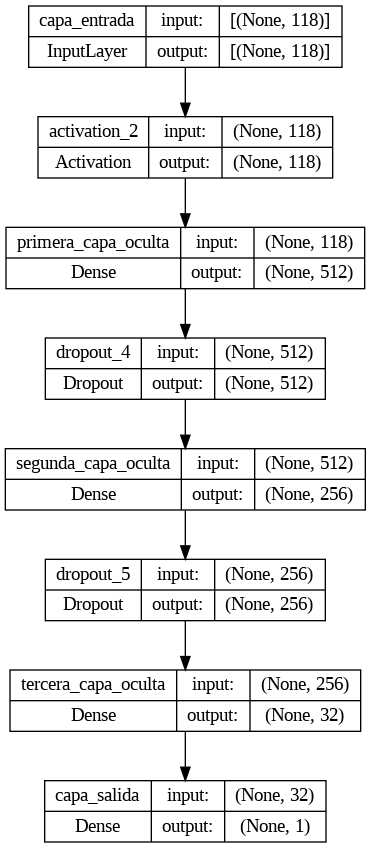

In [56]:
model.summary()
plot_model(model,show_shapes=True)

### metricas

In [57]:
# métricas
metrics = [
    FalseNegatives(name="fn"),
    FalsePositives(name="fp"),
    TrueNegatives(name="tn"),
    TruePositives(name="tp"),
    Precision(name="precision"),
    Recall(name="recall"),
]

model.compile(optimizer=Adam(1e-2), loss="binary_crossentropy", metrics=metrics)

In [58]:
class_weight = {0: weight_for_0, 1: weight_for_1}
#random_seed = 42
history = model.fit(
    train_features,
    train_targets,
    batch_size=50,
    epochs=100,
    verbose=2,
    validation_data=(val_features, val_targets),
    class_weight=class_weight,
)

Epoch 1/100
18/18 - 2s - loss: 0.0019 - fn: 248.0000 - fp: 197.0000 - tn: 241.0000 - tp: 190.0000 - precision: 0.4910 - recall: 0.4338 - val_loss: 0.5806 - val_fn: 109.0000 - val_fp: 0.0000e+00 - val_tn: 2416.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - 2s/epoch - 113ms/step
Epoch 2/100
18/18 - 0s - loss: 0.0016 - fn: 208.0000 - fp: 245.0000 - tn: 193.0000 - tp: 230.0000 - precision: 0.4842 - recall: 0.5251 - val_loss: 0.6916 - val_fn: 60.0000 - val_fp: 944.0000 - val_tn: 1472.0000 - val_tp: 49.0000 - val_precision: 0.0493 - val_recall: 0.4495 - 291ms/epoch - 16ms/step
Epoch 3/100
18/18 - 0s - loss: 0.0016 - fn: 208.0000 - fp: 207.0000 - tn: 231.0000 - tp: 230.0000 - precision: 0.5263 - recall: 0.5251 - val_loss: 0.8000 - val_fn: 27.0000 - val_fp: 1822.0000 - val_tn: 594.0000 - val_tp: 82.0000 - val_precision: 0.0431 - val_recall: 0.7523 - 308ms/epoch - 17ms/step
Epoch 4/100
18/18 - 0s - loss: 0.0015 - fn: 132.0000 - fp: 193.0000 - tn: 245.0000 - tp:

### Predicciones

In [59]:
# predict the training set
y_pred_train = model.predict(train_features)
y_pred_train[y_pred_train > 0.5] = 1
y_pred_train[y_pred_train <= 0.5] = 0
y_pred_train.reshape((y_pred_train.shape[0]))
# Predicting the validation set
y_pred_val = model.predict(val_features)
y_pred_val[y_pred_val > 0.5] = 1
y_pred_val[y_pred_val <= 0.5] = 0
y_pred_val.reshape((y_pred_val.shape[0]))

79/79 [==============================] - 0s 3ms/step


array([0., 0., 0., ..., 0., 0., 1.], dtype=float32)

### Resultados
Calcula métricas

In [60]:
#
# elimina dimensiones sobrantes
val_targets = np.squeeze(val_targets)
y_pred_val = np.squeeze(y_pred_val)
train_targets = np.squeeze(train_targets)
y_pred_train = np.squeeze(y_pred_train)
#
# falsos negativos validación
fn_val = FalseNegatives()
fn_val.update_state(val_targets, y_pred_val)
fn_val = fn_val.result().numpy()
#
# falsos negativos entrenamiento
fn_train = FalseNegatives()
fn_train.update_state(train_targets, y_pred_train)
fn_train = fn_train.result().numpy()
#
# falsos positivos validación
fp_val = FalsePositives()
fp_val.update_state(val_targets, y_pred_val)
fp_val = fp_val.result().numpy()
#
# falsos positivos entrenamiento
fp_train = FalsePositives()
fp_train.update_state(train_targets, y_pred_train)
fp_train = fp_train.result().numpy()
#
# Precision validación
pre_val = Precision()
pre_val.update_state(val_targets, y_pred_val)
pre_val = pre_val.result().numpy()
#
# falsos negativos entrenamiento
pre_train = Precision()
pre_train.update_state(train_targets, y_pred_train)
pre_train = pre_train.result().numpy()
#
# recall validación
re_val = Recall()
re_val.update_state(val_targets, y_pred_val)
re_val = re_val.result().numpy()
#
# recall entrenamiento
re_train = Recall()
re_train.update_state(train_targets, y_pred_train)
re_train = re_train.result().numpy()
#

# diccionario
metricas = {'Falsos_positivos_train':fp_train, 'Falsos_positivos_val':fp_val,
           '%Falsos_positivos': np.round((fp_train+fp_val)/ len(X)*100,4),
           'Falsos_negativos_train':fn_train, 'Falsos_negativos_val':fn_val,
           '%Falsos_negativos': np.round((fn_train+fn_val)/ len(X)*100,4),
           'Precision_train': pre_train, 'Precision_val': pre_val,
           'Recall_train': re_train, 'Recall_val':re_val,
            'F1-score_val': 2*(pre_val*re_val)/(pre_val+re_val)*100  }

In [61]:
metricas

{'Falsos_positivos_train': 0.0,
 'Falsos_positivos_val': 876.0,
 '%Falsos_positivos': 25.7571,
 'Falsos_negativos_train': 2.0,
 'Falsos_negativos_val': 60.0,
 '%Falsos_negativos': 1.823,
 'Precision_train': 1.0,
 'Precision_val': 0.052972972,
 'Recall_train': 0.9954338,
 'Recall_val': 0.44954127,
 'F1-score_val': 9.477756532899052}

### Evaluación del modelo

In [62]:

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+ metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Entrenamiento y validación '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

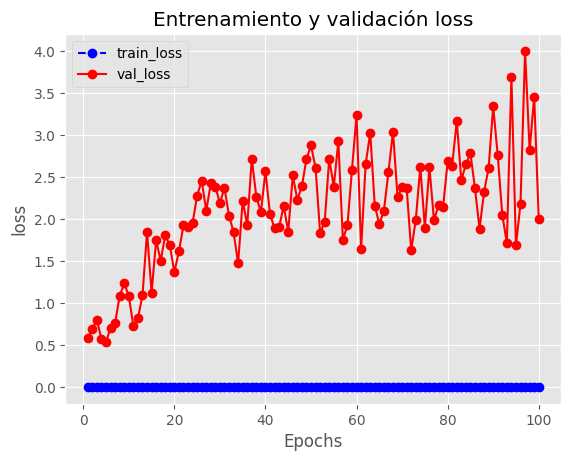

In [63]:
plot_metric(history, 'loss')

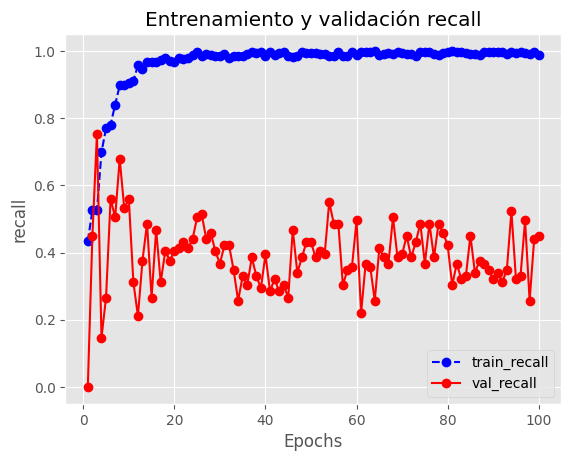

In [64]:
plot_metric(history, 'recall')